<a href="https://colab.research.google.com/github/Sandeep0076/Dark-web-text-analysis/blob/main/Topic_modelling_fake_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [ ]:

from google.colab import drive
drive.mount("/content/Gdrive")


Mounted at /content/Gdrive


In [ ]:
import pandas as pd

In [ ]:
file_location="/content/Gdrive/My Drive/covid19_news_dataset.csv"
df = pd.read_csv(file_location)

In [ ]:
df.head(2)

,date,title,body,url,fact_check,label
0,29/02/2020,112 Wuhan evacuees sheltered at ITBP quarantin...,"this story is from February 29, 2020\n112 Wuha...",https://timesofindia.indiatimes.com/india/112-...,"https://www.mywot.com/, Trustworthiness : 81 ...",High probability real
1,23/03/2020,Which corona species are you? - Times of India,"Which corona species are you?\nSmall\nMar 21, ...",https://timesofindia.indiatimes.com/india/whic...,"https://www.mywot.com/, Trustworthiness : 81 ...",High probability real


## Data Cleaning

In [ ]:
df = df.drop(columns=['date', 'title', 'url', 
                             'fact_check', 'label'], axis=1)
df = df.dropna()

In [ ]:
df = df.sample(1000)

In [ ]:
df1 = df[df['label']=='fake']

In [ ]:
def clean_txt(text):
        """ Remove special characters from text """

        text = re.sub("'", "", text)
        text = re.sub("(\\W)+", " ", text)
        text = re.sub(r'[^A-Z-a-z. \d/,]', '', text.lower())
        text = ' '.join(text.split())
        return text

In [ ]:
# Load the regular expression library
import re
text = df.body.apply(clean_txt)

In [ ]:
text = text.tolist()

## Tokenize words and further clean-up text

In [ ]:
import gensim
from gensim.utils import simple_preprocess
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
data_words = list(sent_to_words(text))
print(data_words[:1])

[['the', 'chinese', 'doctor', 'who', 'attempted', 'to', 'warn', 'the', 'world', 'about', 'the', 'coronavirus', 'but', 'was', 'silenced', 'by', 'the', 'communist', 'government', 'police', 'having', 'succumbed', 'to', 'the', 'virus', 'himself', 'on', 'thursday', 'li', 'wenliang', 'who', 'was', 'an', 'ophthalmologist', 'working', 'at', 'wuhan', 'central', 'hospital', 'in', 'december', 'when', 'he', 'discovered', 'seven', 'patients', 'with', 'sars', 'like', 'symptoms', 'died', 'after', 'contracting', 'coronavirus', 'vice', 'com', 'reports', 'li', 'wenliang', 'was', 'an', 'opthamologist', 'working', 'at', 'wuhan', 'central', 'hospital', 'in', 'december', 'when', 'he', 'saw', 'test', 'results', 'that', 'showed', 'that', 'seven', 'patients', 'from', 'local', 'market', 'had', 'been', 'diagnosed', 'with', 'an', 'unknown', 'illness', 'that', 'looked', 'lot', 'like', 'sars', 'the', 'virus', 'that', 'killed', 'people', 'across', 'asia', 'in', 'he', 'tried', 'to', 'raise', 'the', 'alarm', 'among', 

## Phrase Modeling: Bi-grams and Tri-grams

In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


## Remove Stopwords, Make Bigrams and Lemmatize

In [ ]:
# NLTK Stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 'fake', 'news'])
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import spacy
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print(data_lemmatized[:1])

[['chinese', 'doctor', 'attempt', 'silence', 'communist', 'government', 'police', 'succumb', 'virus', 'ophthalmologist', 'work', 'discover', 'patient', 'sar', 'symptom', 'die', 'contract', 'com', 'report', 'opthamologist', 'work', 'see', 'test', 'result', 'show', 'patient', 'local', 'market', 'diagnose', 'unknown', 'illness', 'look', 'lot', 'virus', 'kill', 'people', 'try', 'raise', 'alarm', 'friend', 'private', 'messaging', 'group', 'late', 'police', 'order', 'keep', 'quiet', 'go', 'back', 'work', 'front_line', 'fight', 'virus', 'ten', 'thousand', 'other', 'end', 'contract', 'send', 'school', 'alumnus', 'popular', 'chinese', 'messaging', 'app', 'tell', 'privately', 'warn', 'family', 'instead', 'screenshot', 'warning', 'post', 'online', 'name', 'blur', 'go', 'viral', 'hour', 'summon', 'official', 'hospital', 'explain', 'know', 'test', 'day', 'later', 'order', 'appear', 'local', 'police', 'station', 'warn', 'stop', 'spread', 'rumor', 'force', 'sign', 'statement', 'acknowledge', 'misdeme

## Data Transformation: Corpus and Dictionary

In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
# Create Corpus
texts = data_lemmatized
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 2), (8, 1), (9, 1), (10, 1), (11, 2), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 2), (31, 1), (32, 1), (33, 4), (34, 2), (35, 2), (36, 1), (37, 1), (38, 1), (39, 3), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 2), (46, 2), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 4), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 3), (61, 3), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 5), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 2), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 2), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 2), (93, 2), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 3), (101, 1), (102, 1), (103, 2), (104, 1), (105, 1), (106, 1), (107, 1), (108, 2), (109, 3), (110, 1)

## Base Model

In [ ]:
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=6, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

## View the topics in LDA model

In [ ]:
from pprint import pprint
# Print the Keyword in the 6 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.018*"say" + 0.014*"people" + 0.012*"case" + 0.010*"virus" + '
  '0.009*"report" + 0.008*"state" + 0.008*"official" + 0.007*"government" + '
  '0.006*"also" + 0.006*"chinese"'),
 (1,
  '0.016*"people" + 0.013*"test" + 0.010*"number" + 0.010*"death" + '
  '0.007*"virus" + 0.007*"get" + 0.007*"infection" + 0.007*"day" + '
  '0.007*"spread" + 0.007*"even"'),
 (2,
  '0.015*"vaccine" + 0.012*"patient" + 0.011*"study" + 0.010*"covid" + '
  '0.009*"virus" + 0.008*"new" + 0.008*"use" + 0.007*"also" + 0.006*"may" + '
  '0.006*"treatment"'),
 (3,
  '0.029*"say" + 0.012*"country" + 0.009*"report" + 0.008*"week" + '
  '0.008*"also" + 0.007*"year" + 0.007*"number" + 0.007*"case" + 0.007*"virus" '
  '+ 0.006*"people"'),
 (4,
  '0.011*"say" + 0.009*"government" + 0.006*"time" + 0.006*"go" + 0.006*"make" '
  '+ 0.006*"would" + 0.005*"people" + 0.005*"take" + 0.005*"even" + '
  '0.005*"pay"'),
 (5,
  '0.017*"say" + 0.010*"people" + 0.007*"work" + 0.007*"go" + '
  '0.007*"government" + 0.007*"h

## Compute Model Perplexity and Coherence Score

In [ ]:
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.3655931485785618


In [ ]:
! pip install pyLDAvis
import pyLDAvis.gensim
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
LDAvis_prepared

## Building LDA Mallet Model
So far you have seen Gensim’s inbuilt version of the LDA algorithm. Mallet’s version, however, often gives a better quality of topics.

In [ ]:
# Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
import urllib, os, time, tarfile
url='http://mallet.cs.umass.edu/dist/mallet-2.0.8.tar.gz'
filename = 'malletfile'
urllib.request.urlretrieve(url, filename)

('malletfile', <http.client.HTTPMessage at 0x7f15c9752898>)

In [ ]:
with tarfile.open(filename, "r:gz") as tar:
    tar.extractall()

In [ ]:
mallet_path = '/content/mallet-2.0.8/bin/mallet'
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=5, id2word=id2word)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:418: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:418: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)


In [ ]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

[(0,
  [('government', 0.009323165350410717),
   ('people', 0.008508519834355412),
   ('world', 0.007988051865764522),
   ('call', 0.00739969677083569),
   ('make', 0.007150777307596569),
   ('chinese', 0.006336131791541264),
   ('claim', 0.006064583286189496),
   ('public', 0.0058609219071756695),
   ('time', 0.005725147654499785),
   ('trump', 0.005657260528161843)]),
 (1,
  [('patient', 0.020474010106521792),
   ('test', 0.016654409148062918),
   ('covid', 0.015515646129391948),
   ('virus', 0.014353158881165335),
   ('study', 0.009798106806481459),
   ('vaccine', 0.009726934117814523),
   ('symptom', 0.00851699841047662),
   ('show', 0.008208583426253233),
   ('result', 0.008137410737586297),
   ('find', 0.008066238048919361)]),
 (2,
  [('year', 0.015404334100780898),
   ('company', 0.012033894282120055),
   ('economy', 0.010206261422705372),
   ('month', 0.009755287080771878),
   ('crisis', 0.009399254705561225),
   ('business', 0.009161899788754124),
   ('market', 0.0088770738885

In [ ]:
# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)


Coherence Score:  0.44287935163792574


In [ ]:
find the optimal number of topics for LDA

## Find the optimal number of topics for LDA
Find different values of number of topics (k) and pick the one that gives the highest coherence value.

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=4, limit=10, step=1)

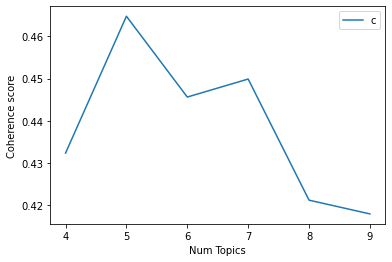

In [ ]:
# Show graph
import matplotlib.pyplot as plt

limit=10; start=4; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()